# 1. 라이브러리 임포트

In [1]:
### import
import pandas as pd
import numpy as np

# 데이터 프레임 row 제한
pd.set_option('display.max_columns', 60)

# matplotlib 화면 표시
import matplotlib.pyplot as plt
%matplotlib inline

# 폰트사이즈 설정
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn 화면 표시
import seaborn as sns
sns.set(font_scale = 2)

# 데이터 분리를 통한 훈련데이터와 테스터 데이터 학습
from sklearn.model_selection import train_test_split

# 2. 데이터 정제

In [2]:
# 훈련 데이터 불러오기
credit = pd.read_csv('dataset/credit_train.csv')

# 데이터 확인
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
credit.shape

(100514, 19)

In [4]:
# 데이터 정보 확인
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [5]:
# 데이터 성분 분석
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [6]:
# 'Loan ID', 'Customer ID' 정보 삭제 
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

### 데이터 결측치 처리

In [12]:
# 결측치 분석 함수 만들기

def missing_values_table(df):
    
    # 총 결측치 
    mis_val = df.isnull().sum()
    
    # 결측치의 퍼센트 확인
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # 결과값으로 테이블 만들기
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # 칼럼명 재지정
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # 결측치 내림차순으로 테이블 정렬
    mis_val_table_ren_columns = mis_val_table_ren_columns[
           mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
       '% of Total Values', ascending=False).round(1)
        
    # 정보 요약
    print ("선택한 데이터는" + str(df.shape[1]) + " 개의 컬럼이 존재합니다.\n"      
            "결측치가 있는 칼럼은 " + str(mis_val_table_ren_columns.shape[0]) +
              " 개입니다.")
    
    # 데이터프레임 리턴
    return mis_val_table_ren_columns
    
    

In [13]:
# 데이터 결측치 분석함수에 데이터 집어 넣기
missing_values_table(credit)

선택한 데이터는17 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 17 개입니다.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


#### * 50% 이상 데이터가 없는 'Months since last delinquent' 는 상관성에 무의미 함으로 판단하고 분석 데이블에서 제외 할 것

In [14]:
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [17]:
# 514개의 결측치가 발견된 곳 확인
credit[credit['Years of Credit History'].isnull()]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### * 마지막 514 rows 가 모두 결측치인것을 확인

In [18]:
credit.drop(credit.tail(514).index, inplace=True) 
# 마지막 514 row 삭제
missing_values_table(credit)

선택한 데이터는16 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 6 개입니다.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


#### * 'Maximum Open Credit, Tax Liens, Bankruptcies' 는 매우 적은 결측치를 갖기 때문에 삭제 한다

In [22]:
credit.drop(credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index, inplace=True)
credit.drop(credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index, inplace=True)
credit.drop(credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index, inplace=True)

선택한 데이터는16 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 5 개입니다.


,Missing Values,% of Total Values
Credit Score,19153,19.2
Annual Income,19153,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0


In [26]:
missing_values_table(credit)

선택한 데이터는16 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 3 개입니다.


,Missing Values,% of Total Values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


#### * 평균값으로 나머지 결측치값을 대체 하기

In [27]:
# inplace=True 는 변수값을 직접 변경한다는 뜻이다.
credit.fillna(credit.mean(), inplace=True)
missing_values_table(credit)

선택한 데이터는16 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 1 개입니다.


,Missing Values,% of Total Values
Years in current job,4222,4.2


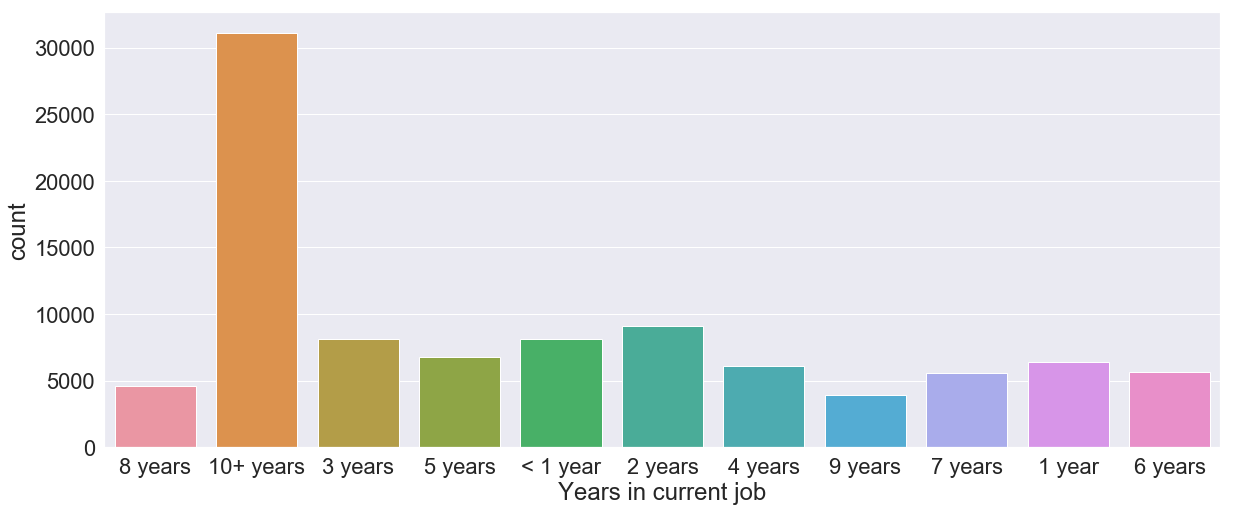

In [28]:
# "Years in current job" 는 범주형 데이터로 평균값을 찾을수 없다.
# 따라서 가장 양이 많은 데이터를 찾아서 대체 할 것
plt.figure(figsize=(20,8))
sns.countplot(credit['Years in current job'])

In [29]:
credit.fillna('10+ years', inplace=True)
# 가장 많은 데이터인 '10+ years' 로 결측치를 대체하겠다.
missing_values_table(credit)

선택한 데이터는16 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 0 개입니다.


,Missing Values,% of Total Values


In [ ]:
# 상관 관계 분석
sns.pairplot(credit)

In [30]:
# 모든 상관관계 찾기 및 정렬
correlations_data = credit.corr()['Credit Score'].sort_values(ascending=False)

# 상관관계 출력
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Number of Open Accounts      0.005726
Tax Liens                    0.004765
Current Credit Balance       0.000168
Monthly Debt                -0.001457
Maximum Open Credit         -0.002073
Number of Credit Problems   -0.002785
Bankruptcies                -0.006257
Years of Credit History     -0.008652
Annual Income               -0.016989
Current Loan Amount         -0.095108
Name: Credit Score, dtype: float64>


In [31]:
credit.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [32]:
credit.select_dtypes(include = "object")

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation
4,Fully Paid,Short Term,5 years,Rent,Debt Consolidation
5,Charged Off,Short Term,10+ years,Home Mortgage,Debt Consolidation
6,Fully Paid,Short Term,< 1 year,Home Mortgage,Debt Consolidation
7,Charged Off,Long Term,< 1 year,Home Mortgage,Buy House
8,Fully Paid,Short Term,2 years,Rent,Debt Consolidation
9,Fully Paid,Short Term,< 1 year,Rent,Debt Consolidation


In [33]:
# 범주형 데이터 확인
categorical_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# one hot encoding(더미함수 사용)
categorical_subset = pd.get_dummies(categorical_subset)

credit.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

In [34]:
credit

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,Fully Paid,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Fully Paid,262328.0,1076.275101,1.378339e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Fully Paid,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Fully Paid,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Fully Paid,176220.0,1076.275101,1.378339e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Charged Off,206602.0,7290.000000,8.968570e+05,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,Fully Paid,217646.0,730.000000,1.184194e+06,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,Charged Off,648714.0,1076.275101,1.378339e+06,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fully Paid,548746.0,678.000000,2.559110e+06,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,Fully Paid,215952.0,739.000000,1.454735e+06,39277.75,13.9,20.0,0.0,669560.0,1021460.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# 3. 데이터 학습

In [35]:
# 학습데이터 분리
features = credit.drop(columns='Loan Status')
targets = pd.DataFrame(credit['Loan Status'])

# 학습데이터와 테스트데이터는 8:2 비율
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79835, 44)
(19959, 44)
(79835, 1)
(19959, 1)


### 데이터 분석 전처리

#### *  스케일링(Scailing)
스케일링을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지 하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상 시킨다.

https://mkjjo.github.io/python/2019/01/10/scaler.html 링크 참고

In [36]:
# 스케일링
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 독립변수들 one hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A colum

In [37]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [38]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [43]:
X_train

array([[-0.36102332, -0.29098075,  0.52858264, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35523419, -0.26165702,  0.48407171, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.357882  , -0.26165702, -0.35823972, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       ...,
       [-0.36101847, -0.27744672,  0.47657733, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.36255586, -0.25789757, -0.77726096, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35567642, -0.2556419 ,  0.1256506 , ..., -0.05147771,
        -0.03206516, -0.0343339 ]])

In [44]:
X_test

array([[-3.63944227e-01, -2.69927815e-01, -7.23642936e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.62381883e-01, -1.29610336e-03,  4.31089330e-04, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.58970926e-01, -2.93236417e-01,  2.06722719e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       ...,
       [-3.62962737e-01, -2.57145679e-01,  1.03184451e+00, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.59089453e-01, -2.81958061e-01,  1.27927374e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.63813916e-01, -2.48874885e-01, -4.02692887e-02, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02]])

In [46]:
# 평가 모델 만들기

# MAE계산을 위한 함수 선언
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# 모델을 가져 와서 모델을 학습시키고 테스트 세트에서 모델을 평가.
def fit_and_evaluate(model):
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측 및 평가 모델 
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # performance metric 출력
    return model_cross

## Logistic Regression

In [47]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Logistic Regression Performance on the test set: Cross Validation Score = 0.8197


## Random Forest Classification

In [48]:
# # 랜덤 포레스트(분류)
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.8005


## Gradiente Boosting Classification

In [50]:
# # 그래디언드 부스팅(분류)
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.8197


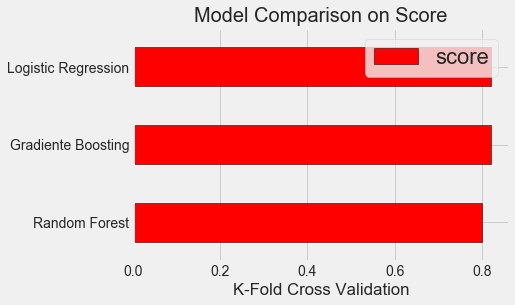

In [51]:
# 최적의 모델 값 선정을 위한 그래프 비교

plt.style.use('fivethirtyeight')
figsize=(8, 6)

# 결과값 저장용 데이터프레임
model_comparison = pd.DataFrame({'model': ['Logistic Regression',
                                           'Random Forest',
                                            'Gradiente Boosting'],
                                 'score': [logr_cross, random_cross, gb_cross]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);

In [54]:
# 모델 최적화

# 최적화를 위한 손실 함수
loss = ['ls', 'lad', 'huber']

# 부스팅에 사용할 트리 수 성정
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree(최대깊이)
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf(최소잎사귀노드)
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node(최소분리노드)
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# 검색을 위한 하이퍼 파라미터 정의
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [55]:
# 하이퍼 파라미터 튜닝 사용을 위한 모델 생성
model = XGBClassifier(random_state = 42)

# 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
# 트레이닝 데이터에 적용
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
# CV 결과와 테스트 성능 모두를 출력
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)